## Given the following graph, implement the algorithm in Python.

1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

### 1. Kruskal's Algorithm: 

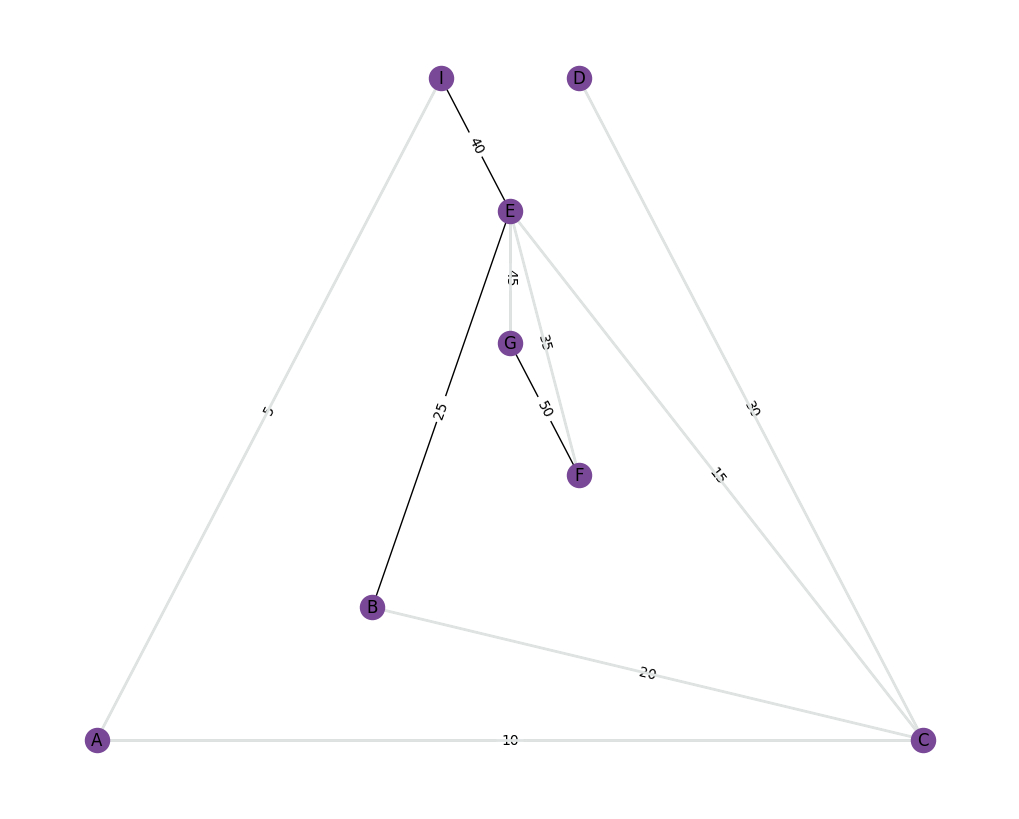

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

def kruskal(graph):
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    for edge in edges:
        u, v, w = edge
        mst.add_edge(u, v, weight=w['weight'])
        if len(nx.cycle_basis(mst)) > 0:
            mst.remove_edge(u, v)
    return mst

mst = kruskal(G)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
node_color = '#794897'

nx.draw(G, pos=pos, with_labels=True, node_color=node_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

nx.draw_networkx_edges(mst, pos=pos, edge_color='#DFE4E3', width=2)

plt.show()


### 2. Prim's Algorithm: 

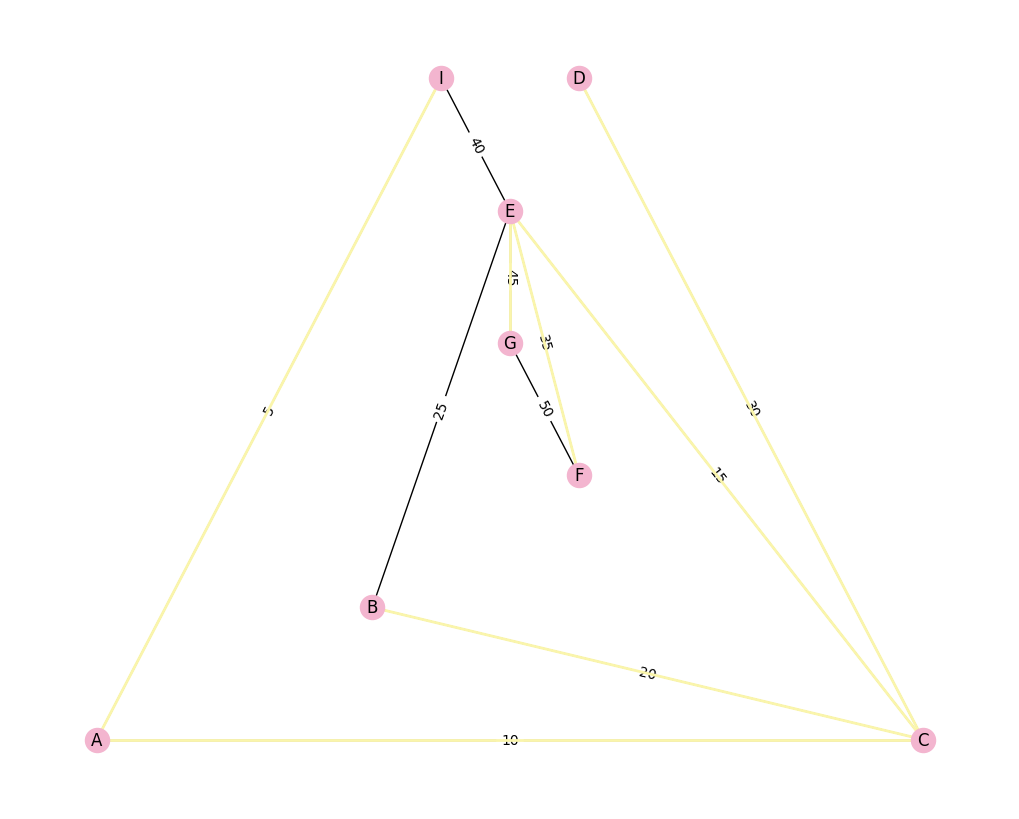

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

def prim(graph):
    mst = nx.Graph()
    start_node = list(graph.nodes())[0]  # Start from an arbitrary node
    mst.add_node(start_node)
    while len(mst.nodes()) < len(graph.nodes()):
        min_edge = None
        min_weight = float('inf')
        for u in mst.nodes():
            for v, weight in graph[u].items():
                if v not in mst.nodes() and weight['weight'] < min_weight:
                    min_edge = (u, v)
                    min_weight = weight['weight']
        if min_edge:
            u, v = min_edge
            mst.add_node(v)
            mst.add_edge(u, v, weight=min_weight)
    return mst

mst = prim(G)

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
node_color = '#F3B5CF'

nx.draw(G, pos=pos, with_labels=True, node_color=node_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Draw the minimum spanning tree
nx.draw_networkx_edges(mst, pos=pos, edge_color='#FAF5AB', width=2)

plt.show()

### 3. Djitraka's Shortest Path Algorithm:

ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 8.

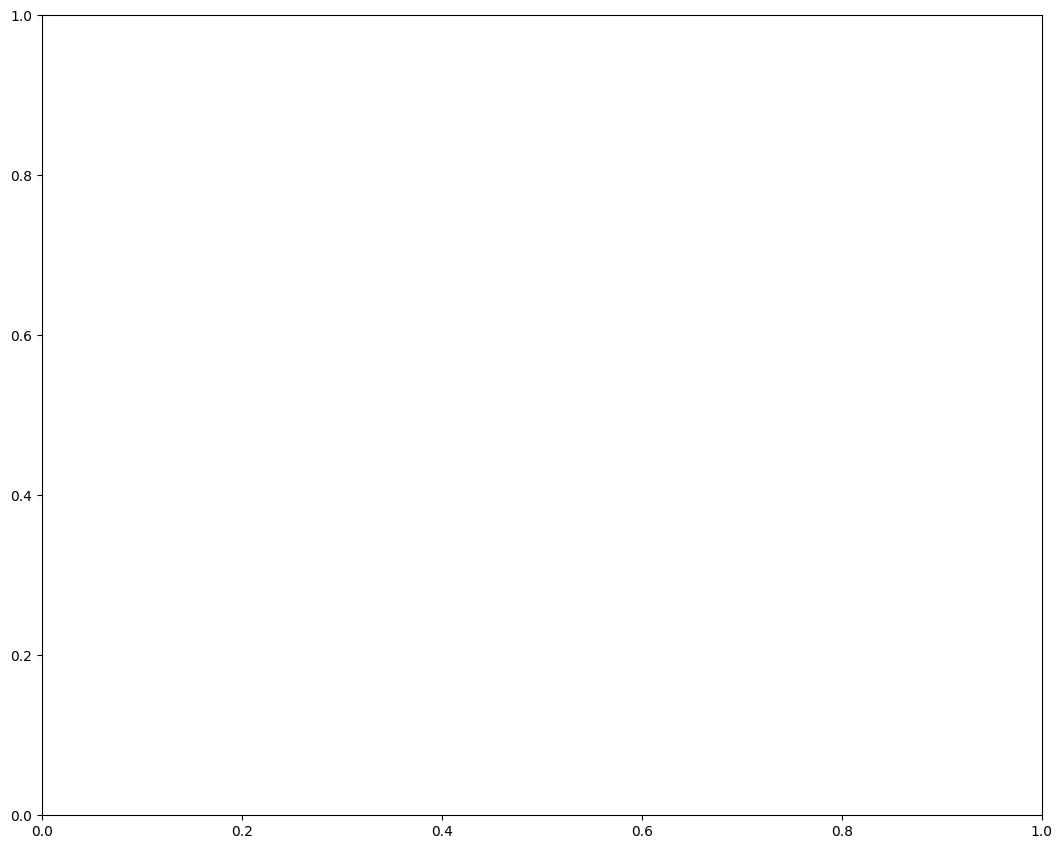

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15),
            ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35),
            ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

def dijkstra(graph, source):
    shortest_paths = {}
    for target in graph.nodes():
        if target != source:
            shortest_path = nx.shortest_path(graph, source=source, target=target, weight='weight')
            shortest_paths[target] = shortest_path
    return shortest_paths

all_shortest_paths = dijkstra(G, "A")

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
node_color = ['#EC4141', '#EF7135', '#FAF5AB', '#5FBB4E', '#632E86']

nx.draw(G, pos=pos, with_labels=True, node_color=node_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

for target, shortest_path in all_shortest_paths.items():
    edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='#732DA2', width=3)

plt.show()
